#### Load Packages

In [15]:
# import required packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.stattools import adfuller

import warnings
warnings.filterwarnings('ignore')

#### Load dataset

In [16]:
df = pd.read_csv(r"C:\Users\Sree\Downloads\MSFT.csv")
df.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-31,233.759995,234.919998,231.149994,232.130005,229.908890,28357300
1,2022-11-01,234.600006,235.740005,227.330002,228.169998,225.986771,30592300
2,2022-11-02,229.460007,231.300003,220.039993,220.100006,217.994003,38407000


#### For exogenous data

In [17]:
df1 = pd.read_csv(r"C:\Users\Sree\Downloads\MSFT.csv")
df1['Date'] = pd.to_datetime(df1['Date'])
df1.set_index('Date',inplace = True)
exog = df1['Open']

#### To datetime And set_index

In [18]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace = True)

In [19]:
df = df[['High','Close']]

In [20]:
# H0: It is non stationary
# H1: It is stationary

def adf_test(data):
    result = adfuller(data)
    labels = ['ADF Test Statistic','p-value','Lags used','Number of Observation Used']
    for value,label in zip(result,labels):
        print(label+ ' : '+str(value))
    if result[1]>=0.05:
        print('data is non-stationary')
    else:
        print("data is stationary")
        
print('Column : High')   
adf_test(df['High'])
print('cloumn : Close')
adf_test(df['Close'])

Column : High
ADF Test Statistic : -1.2071204989989917
p-value : 0.670525176859577
Lags used : 0
Number of Observation Used : 250
data is non-stationary
cloumn : Close
ADF Test Statistic : -1.4175043033962096
p-value : 0.5738561643647346
Lags used : 2
Number of Observation Used : 248
data is non-stationary


#### Model creation

In [22]:
#Specify the order of the VARMA Model (p,q)
p = 2 #order of autoregressive 
q = 1 #order of moving average

#create model
model = VARMAX(df,order = (p,q),exog=exog)

# Fit the model
results = model.fit()
results.summary()

Dep. Variable:,"['High', 'Close']",No. Observations:,251
Model:,"VARMAX(2,1)",Log Likelihood,-1189.955
,+ intercept,AIC,2417.910
Date:,"Fri, 17 Nov 2023",BIC,2484.894
Time:,22:45:13,HQIC,2444.866
Sample:,0,,
,- 251,,
Covariance Type:,opg,,
Ljung-Box (L1) (Q):,"0.96, 0.17",Jarque-Bera (JB):,"843.17, 115.98"
Prob(Q):,"0.33, 0.68",Prob(JB):,"0.00, 0.00"
Heteroskedasticity (H):,"1.56, 1.55",Skew:,"2.07, -1.34"


#### Prediction

In [23]:
# make forecast
forecast_steps = 5

exog_data = df1['Open'][:5]
forecast = results.forecast(steps = forecast_steps,exog=exog_data)

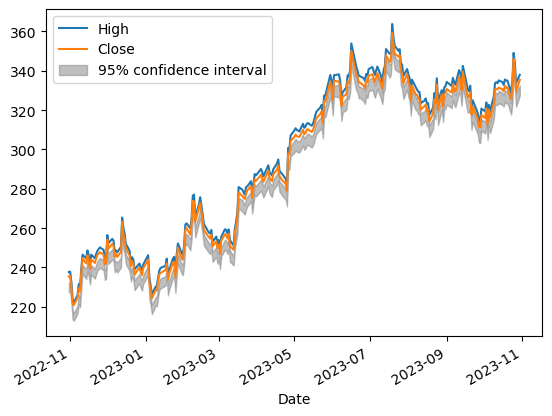

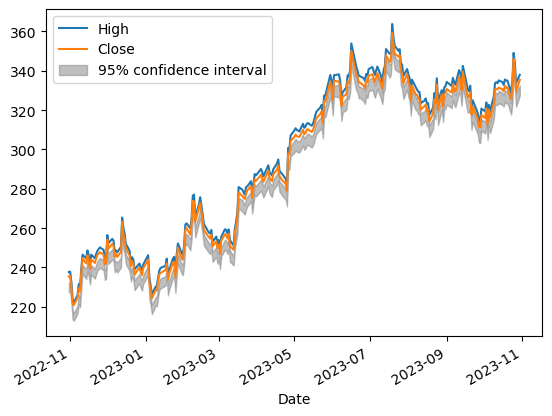

In [26]:
from statsmodels.graphics.tsaplots import plot_predict
plot_predict(results)